# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
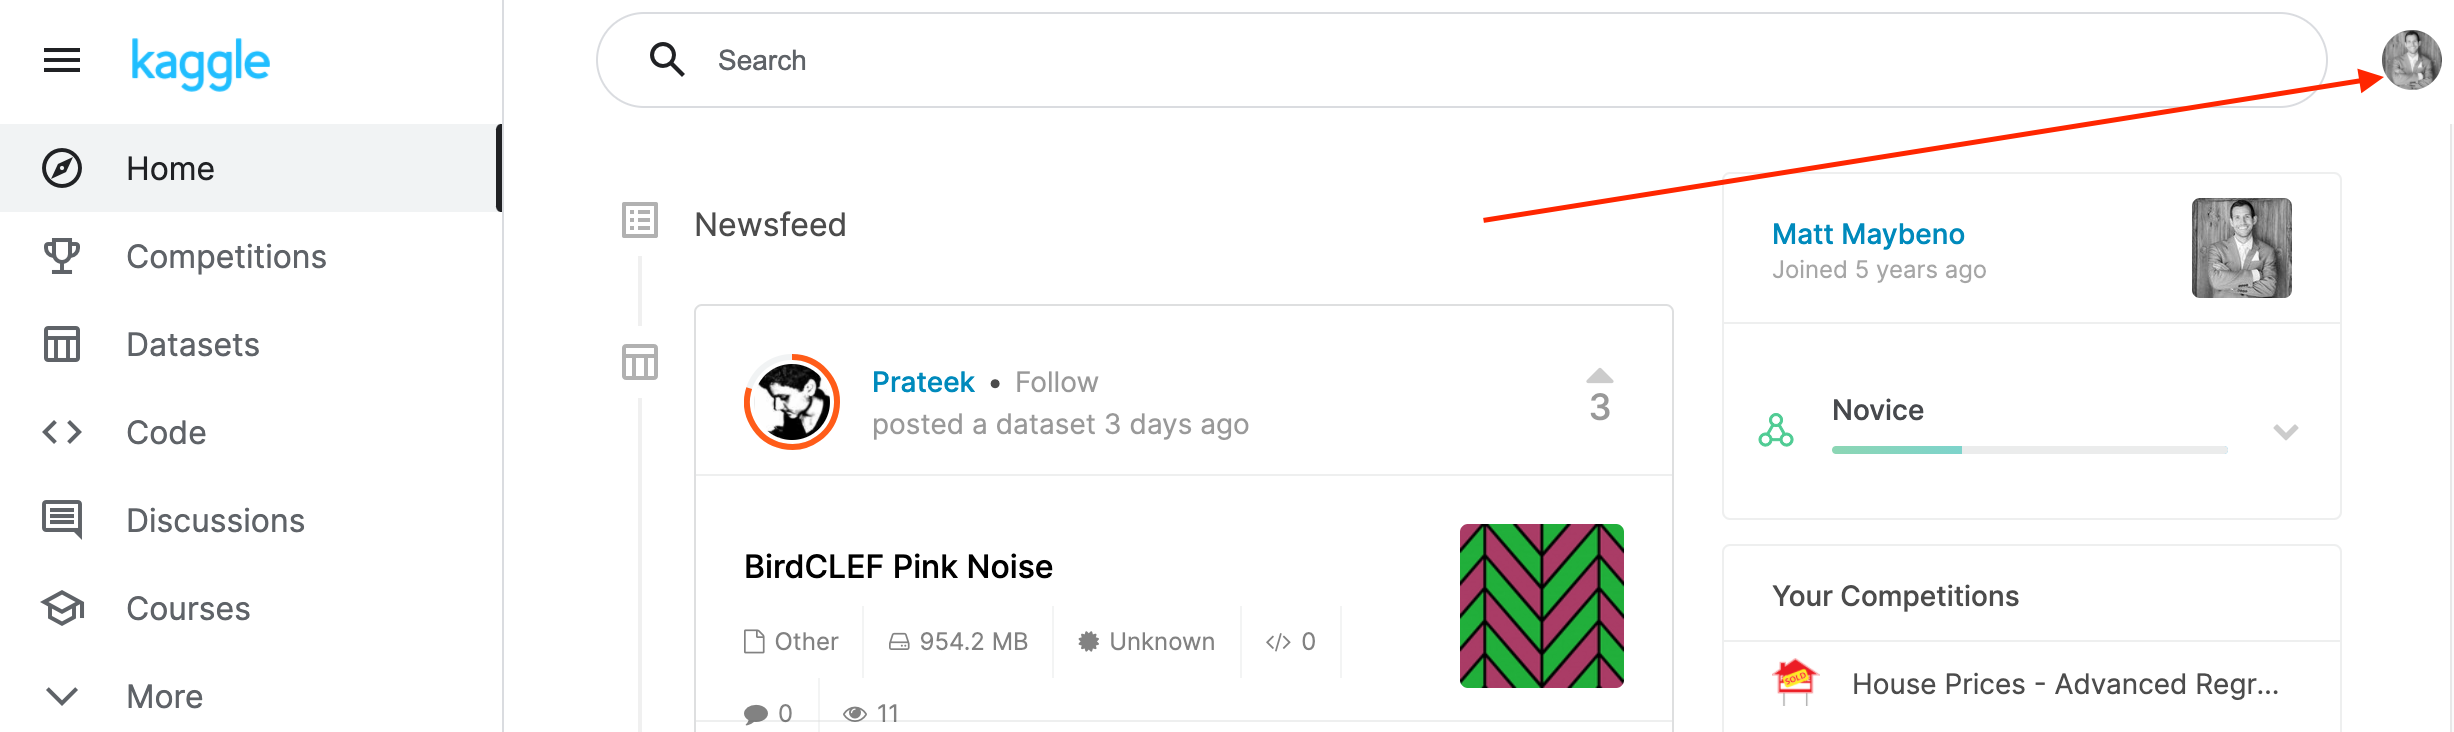
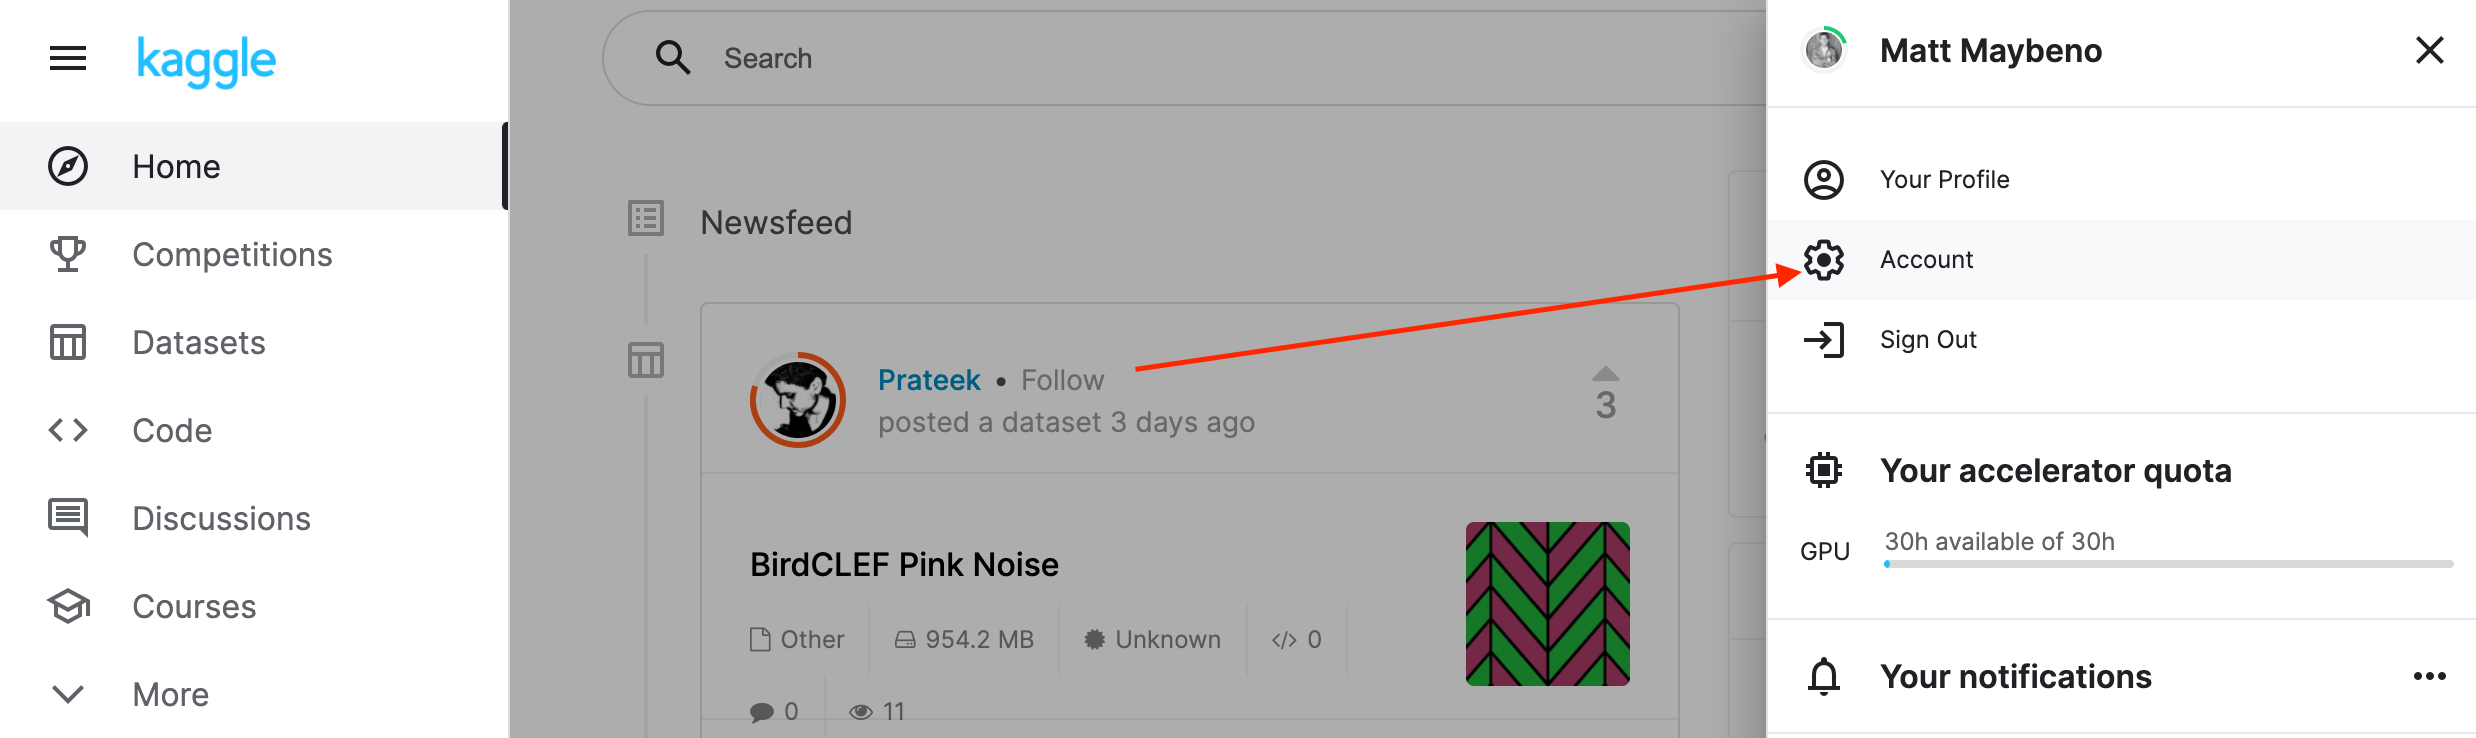
2. Scroll down to API and click Create New API Token.
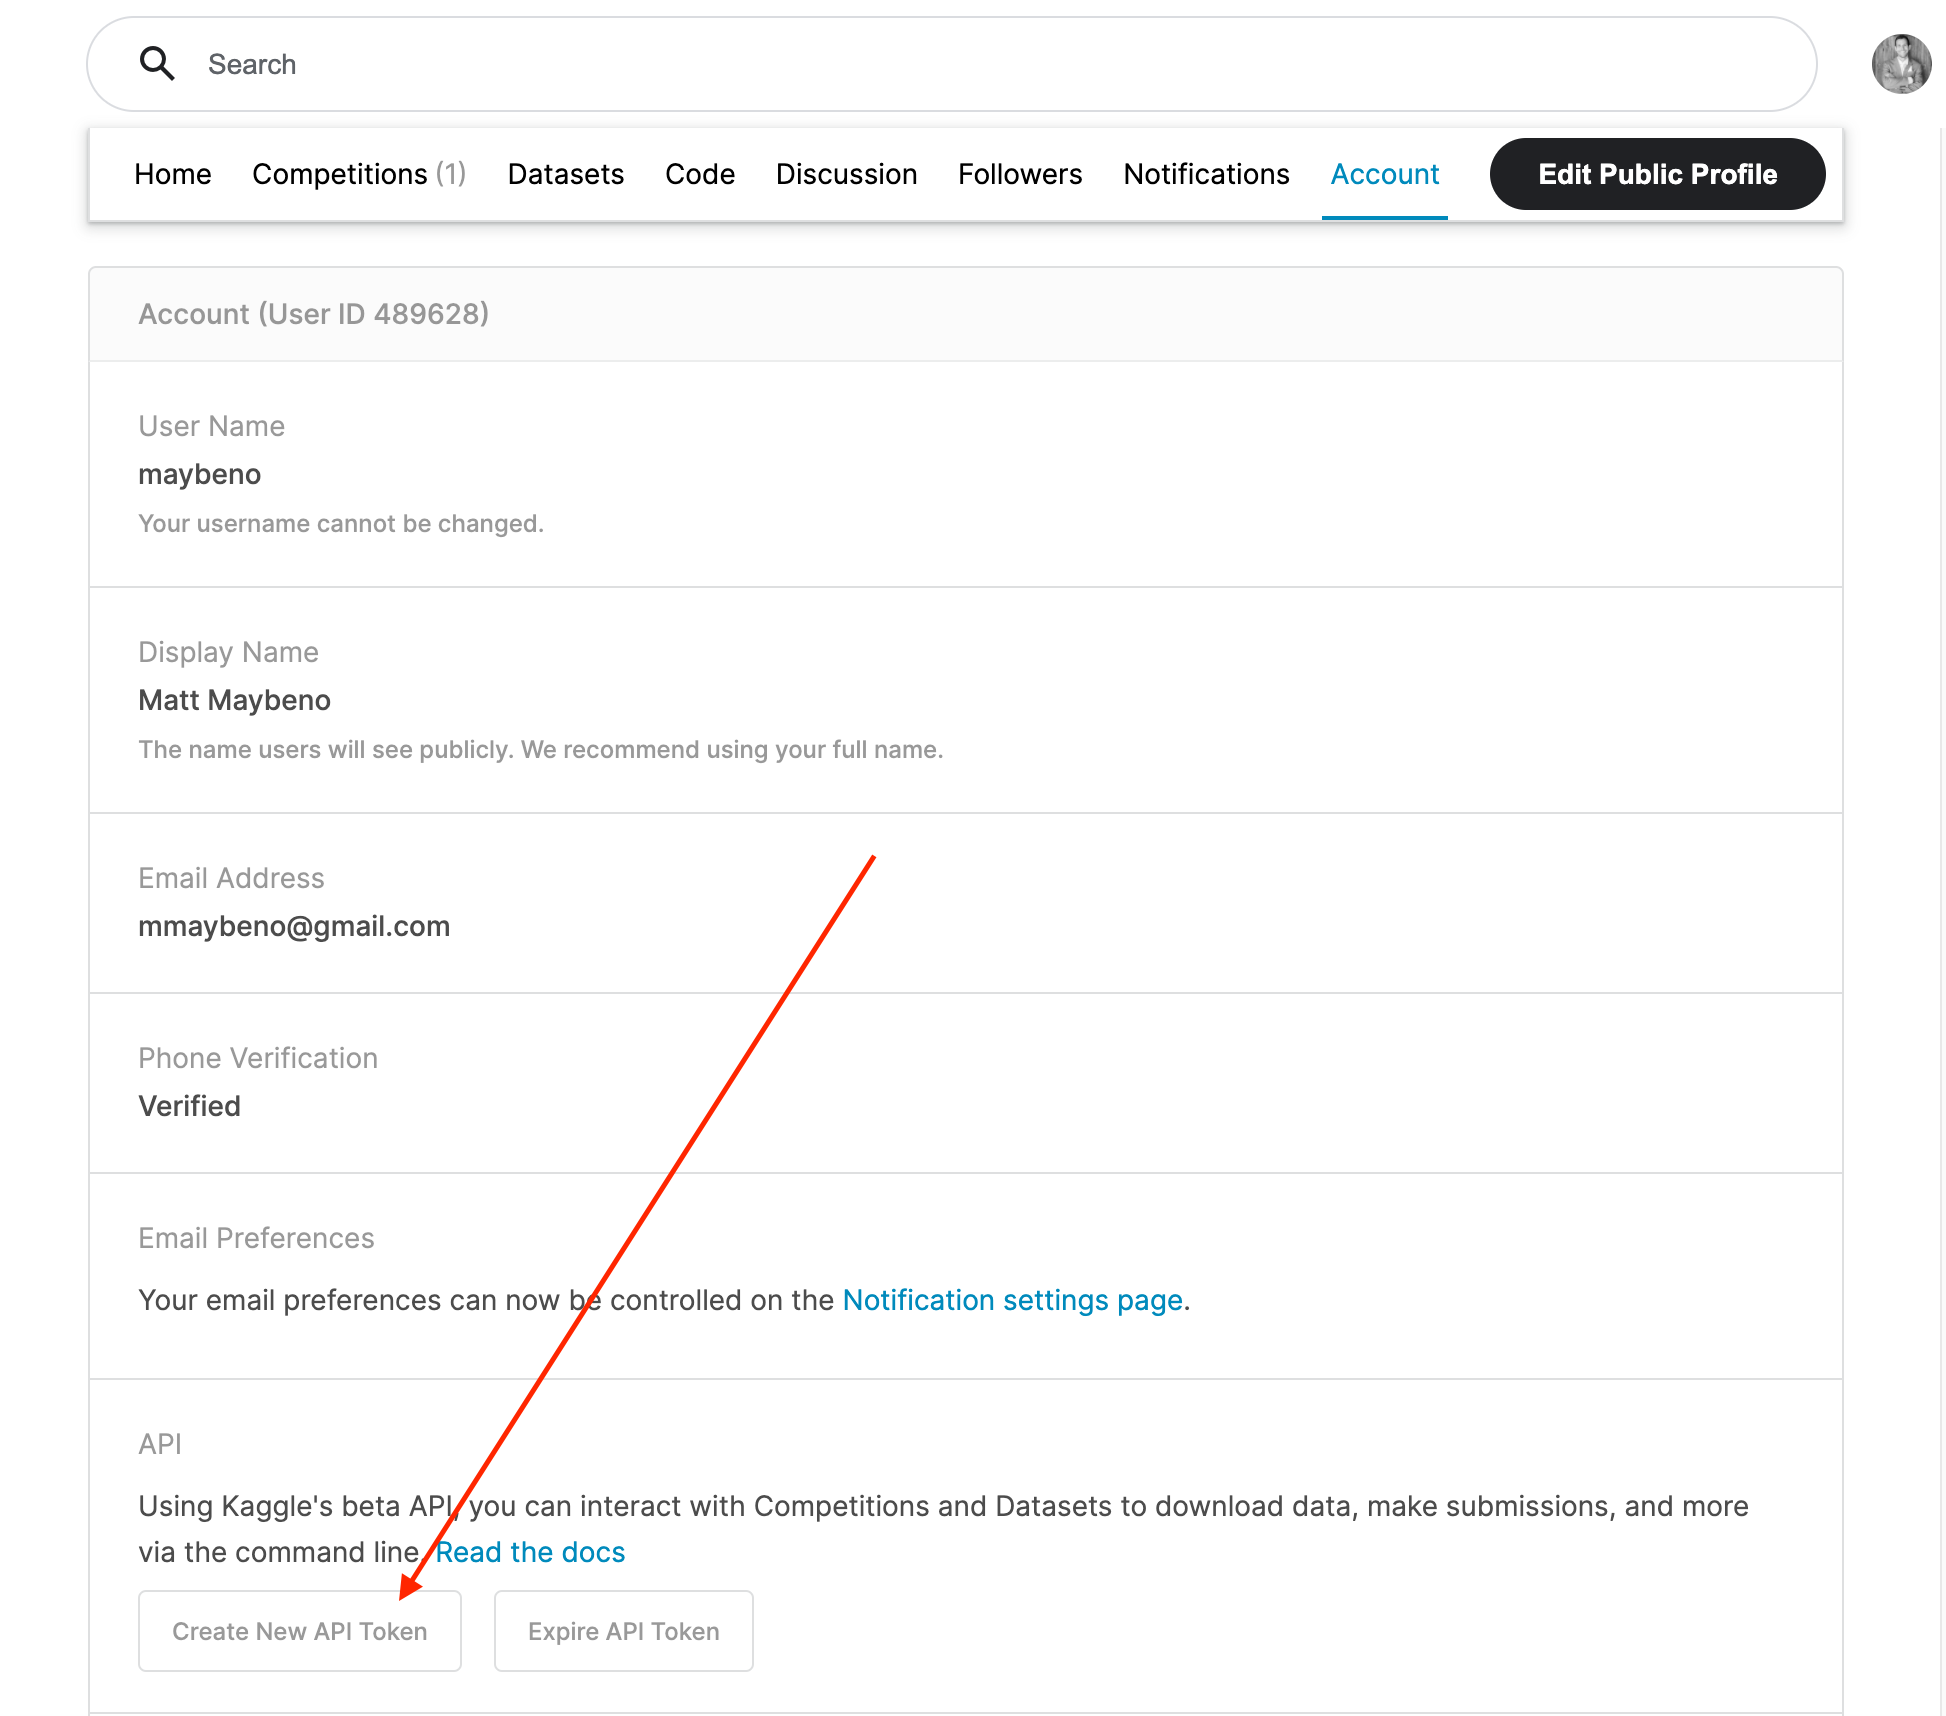
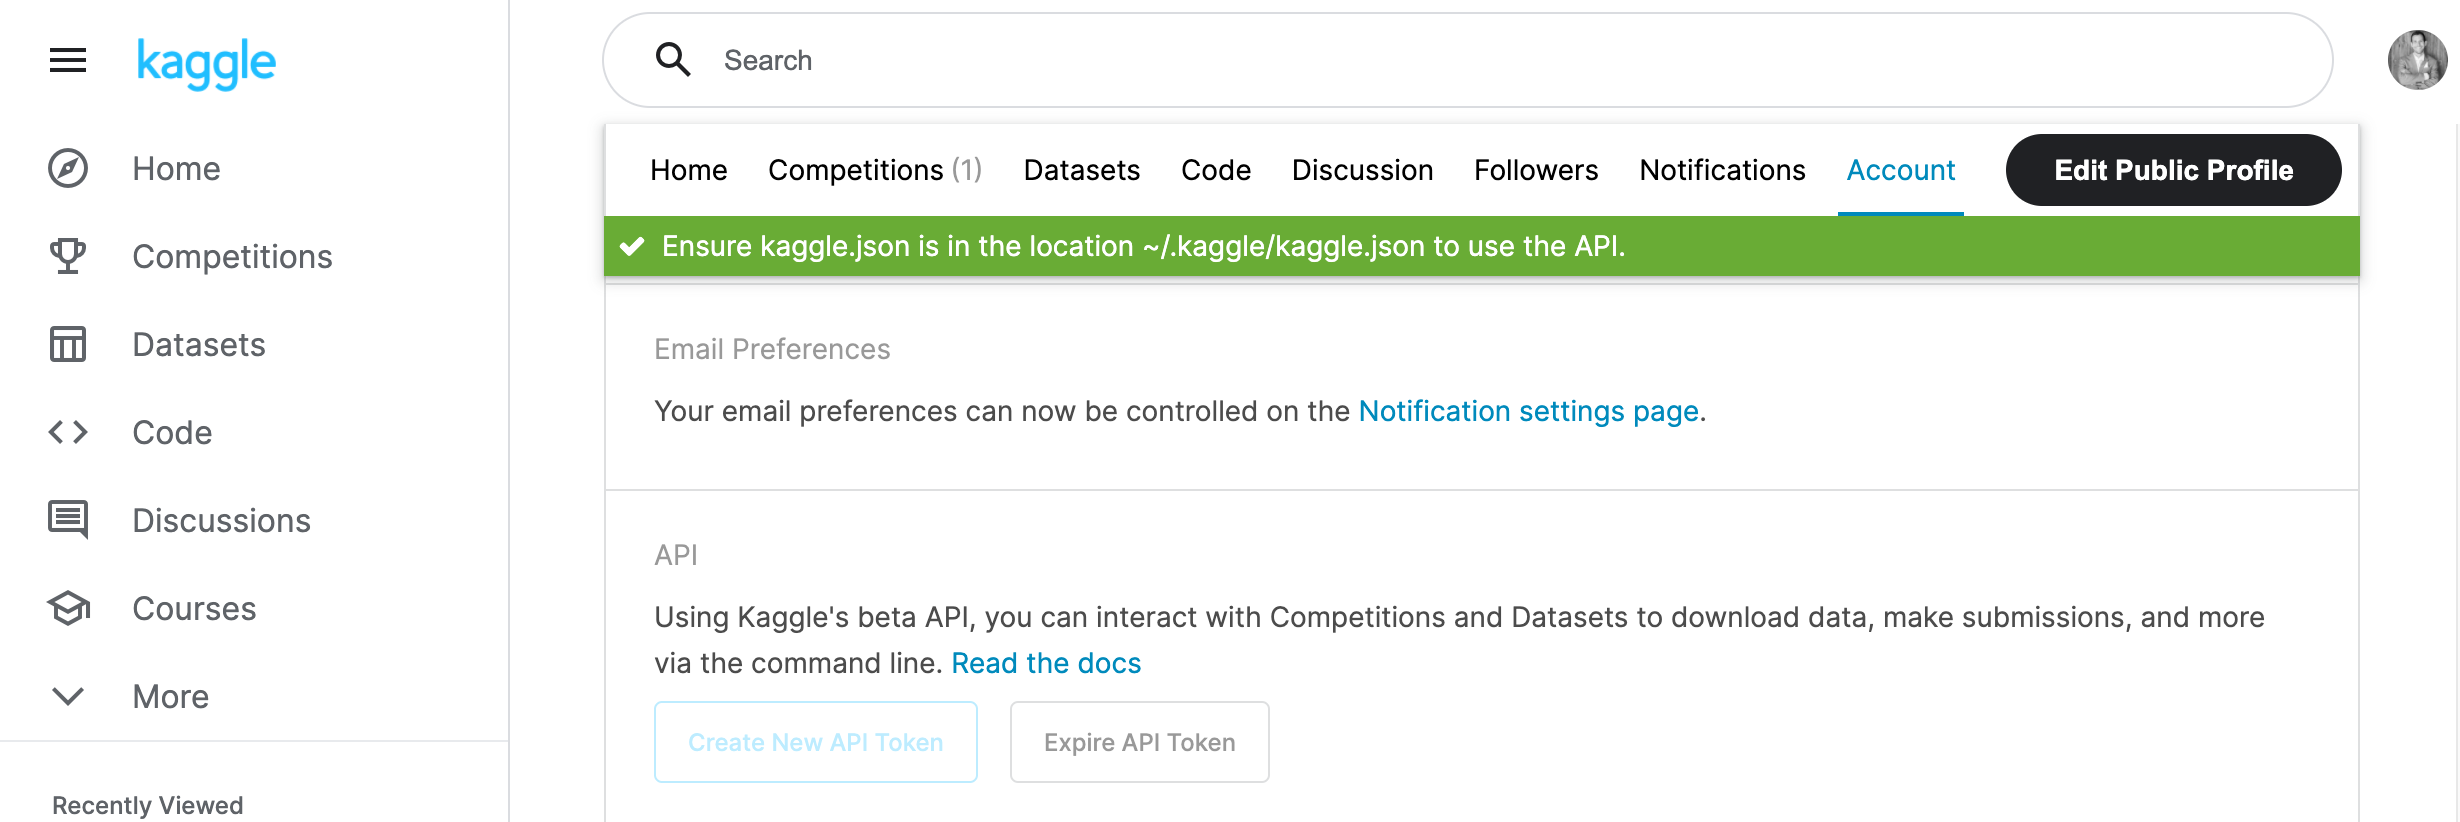
3. Open up `kaggle.json` and use the username and key.
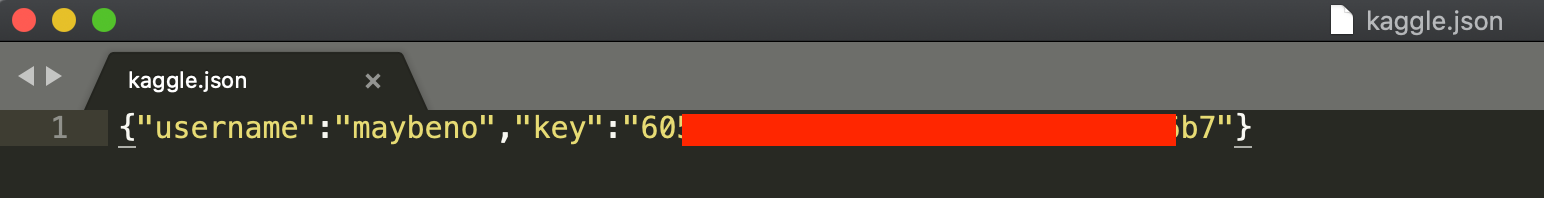

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [153]:
%pip install -U pip
%pip install -U setuptools wheel
%pip install -U "mxnet<2.0.0" bokeh==2.0.1
%pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "FILL_IN_USERNAME"
kaggle_key = "FILL_IN_KEY"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
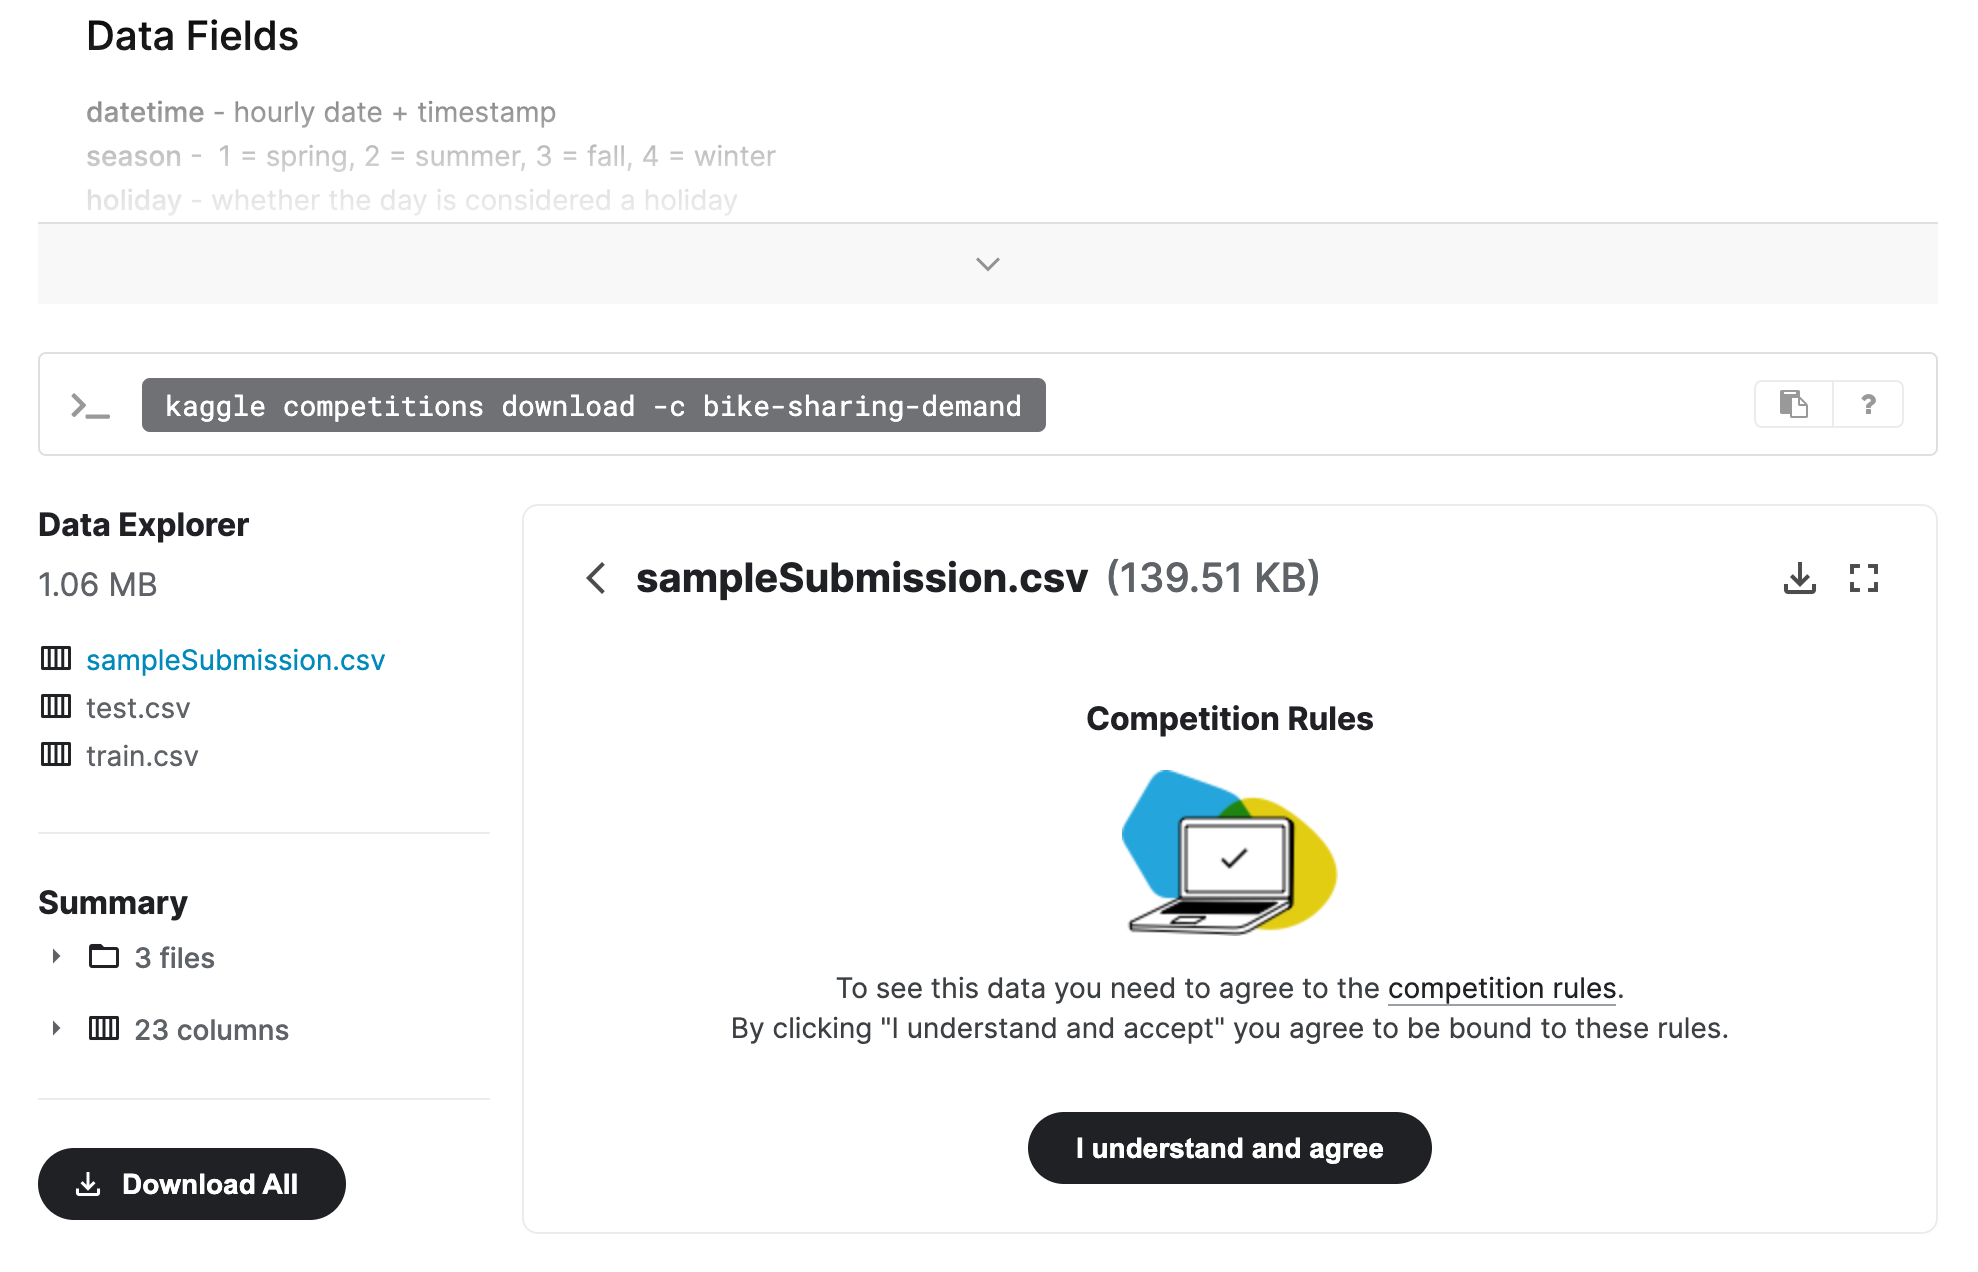

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/Users/darkmoon/Code/courses/Udacity/Intro to ML/cd0385-project-starter/bike-sharing-demand/train.csv", parse_dates=[0])
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"], errors='coerce')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/Users/darkmoon/Code/courses/Udacity/Intro to ML/cd0385-project-starter/bike-sharing-demand/test.csv", parse_dates=[0])
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"], errors='coerce')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# Same thing as train and test dataset
submission = pd.read_csv("/Users/darkmoon/Code/courses/Udacity/Intro to ML/cd0385-project-starter/bike-sharing-demand/sampleSubmission.csv", parse_dates=[0])
submission.loc[:, "datetime"] = pd.to_datetime(submission.loc[:, "datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [6]:
train = train.drop(['casual', 'registered'], axis=1)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [7]:

predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train, time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241228_015120"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.15
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:05:23 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T6031
CPU Count:          16
Memory Avail:       19.86 GB / 48.00 GB (41.4%)
Disk Space Avail:   192.21 GB / 926.35 GB (20.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `nu

(_ray_fit pid=19188) [1000]	valid_set's rmse: 135.845
(_ray_fit pid=19188) [3000]	valid_set's rmse: 133.639 [repeated 13x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=19188) [5000]	valid_set's rmse: 132.706 [repeated 9x across cluster]
(_ray_fit pid=19188) [8000]	valid_set's rmse: 132.379 [repeated 10x across cluster]


(_dystack pid=19170) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=19170) 	26.21s	 = Training   runtime
(_dystack pid=19170) 	1.24s	 = Validation runtime
(_dystack pid=19170) Fitting model: LightGBM_BAG_L1 ... Training model for up to 70.40s of the 119.87s of remaining time.
(_dystack pid=19170) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.04%)


(_ray_fit pid=19323) [1000]	valid_set's rmse: 124.896 [repeated 5x across cluster]


(_dystack pid=19170) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=19170) 	5.48s	 = Training   runtime
(_dystack pid=19170) 	0.22s	 = Validation runtime
(_dystack pid=19170) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 63.94s of the 113.41s of remaining time.
(_dystack pid=19170) 	-119.5502	 = Validation score   (-root_mean_squared_error)
(_dystack pid=19170) 	0.61s	 = Training   runtime
(_dystack pid=19170) 	0.23s	 = Validation runtime
(_dystack pid=19170) Fitting model: CatBoost_BAG_L1 ... Training model for up to 63.01s of the 112.47s of remaining time.
(_dystack pid=19170) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.05%)
(_dystack pid=19170) 	-131.496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=19170) 	28.54s	 = Training   runtime
(_dystack pid=19170) 	0.01s	 = Validation runtime
(_dystack pid=19170) Fitting model: ExtraTreesMSE_BA

(_ray_fit pid=19690) [1000]	valid_set's rmse: 70.5754 [repeated 7x across cluster]


(_dystack pid=19170) 	-72.8084	 = Validation score   (-root_mean_squared_error)
(_dystack pid=19170) 	7.57s	 = Training   runtime
(_dystack pid=19170) 	0.4s	 = Validation runtime
(_dystack pid=19170) Fitting model: LightGBM_BAG_L2 ... Training model for up to 40.26s of the 40.23s of remaining time.
(_dystack pid=19170) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.06%)
(_ray_fit pid=19565) 	Ran out of time, stopping training early. (Stopping on epoch 186) [repeated 2x across cluster]
(_ray_fit pid=19668) 	Ran out of time, early stopping on iteration 176. Best iteration is: [repeated 7x across cluster]
(_ray_fit pid=19668) 	[176]	valid_set's rmse: 135.442 [repeated 7x across cluster]
(_dystack pid=19170) 	-67.5554	 = Validation score   (-root_mean_squared_error)
(_dystack pid=19170) 	2.43s	 = Training   runtime
(_dystack pid=19170) 	0.06s	 = Validation runtime
(_dystack pid=19170) Fitting model: RandomFore

### Review AutoGluon's training run with ranking of models that did the best.

In [8]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -49.335542  root_mean_squared_error       4.859207  369.875940                0.000372           0.047562            3       True         29
1     NeuralNetTorch_r79_BAG_L2  -50.608840  root_mean_squared_error       4.202294  328.564912                0.078439          42.866403            2       True         27
2        NeuralNetFastAI_BAG_L2  -52.192311  root_mean_squared_error       4.193201  291.011277                0.069346           5.312768            2       True         22
3        RandomForestMSE_BAG_L2  -53.629881  root_mean_squared_error       4.375312  288.398500                0.251457           2.699991            2       True         19
4         NeuralNetTorch_BAG_L2  -54.316065  root_mean_squared_error

/Users/darkmoon/.pyenv/versions/3.10.15/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  

<Axes: xlabel='model'>

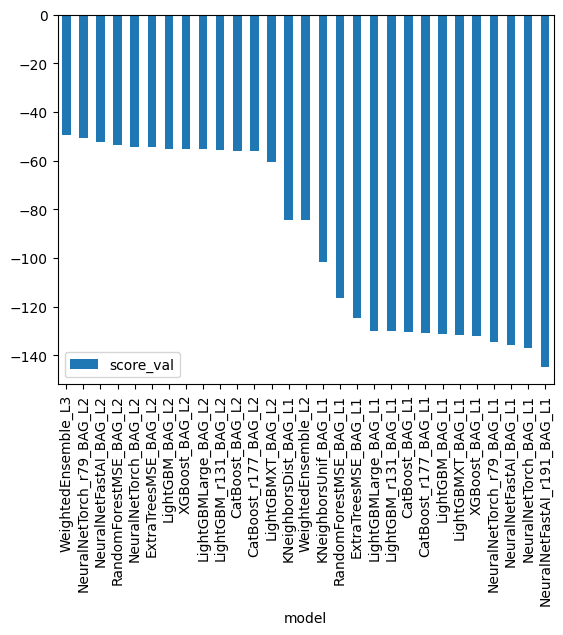

In [9]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")



### Create predictions from test dataset

In [10]:
predictions = predictor.predict(test)
predictions.head()

0    27.608269
1    42.844521
2    48.797531
3    52.953430
4    55.008888
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [11]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       98.965454
std        89.386658
min         4.042409
25%        17.841467
50%        61.840836
75%       173.239136
max       340.243774
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
0

In [12]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [13]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [29]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 381kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [30]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-12-27 19:15:05  first raw submission  complete  1.84847      1.84847       


#### Initial score of `1.84847`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

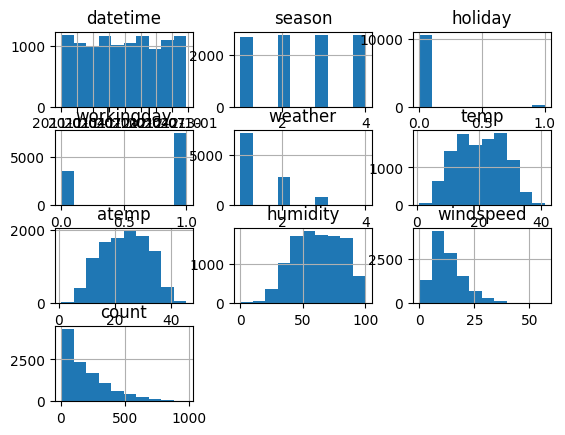

In [14]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [15]:
# create a new feature
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour

# drop holiday and workingday
train.drop(['holiday', 'workingday'], axis=1, inplace=True)

train.head()

,datetime,season,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0,1,2011,1,1,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [16]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

# test datasets
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [17]:
# View are new feature
train.head()

,datetime,season,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

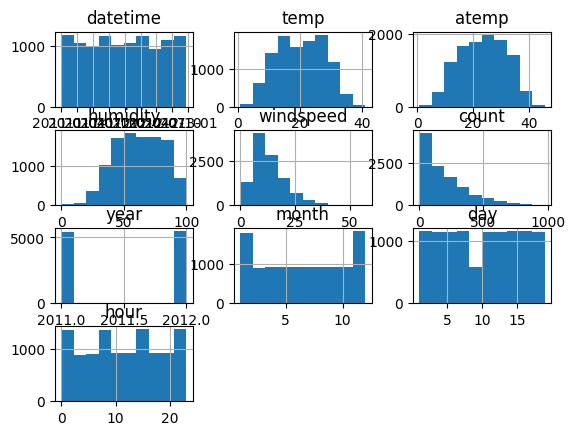

In [18]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [19]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train, time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241228_020642"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.15
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:05:23 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T6031
CPU Count:          16
Memory Avail:       18.43 GB / 48.00 GB (38.4%)
Disk Space Avail:   190.61 GB / 926.35 GB (20.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `nu

In [20]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3  -28.510586  root_mean_squared_error       6.387108  362.406884                0.000285           0.131392            3       True         26
1   NeuralNetTorch_r79_BAG_L2  -28.822549  root_mean_squared_error       6.102552  338.816814                0.089193          52.193958            2       True         24
2      NeuralNetFastAI_BAG_L2  -30.475054  root_mean_squared_error       6.093147  291.777913                0.079788           5.155057            2       True         19
3             CatBoost_BAG_L2  -31.071831  root_mean_squared_error       6.029513  299.856123                0.016154          13.233268            2       True         17
4        CatBoost_r177_BAG_L2  -31.335839  root_mean_squared_error       6.029

/Users/darkmoon/.pyenv/versions/3.10.15/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_

<Axes: xlabel='model'>

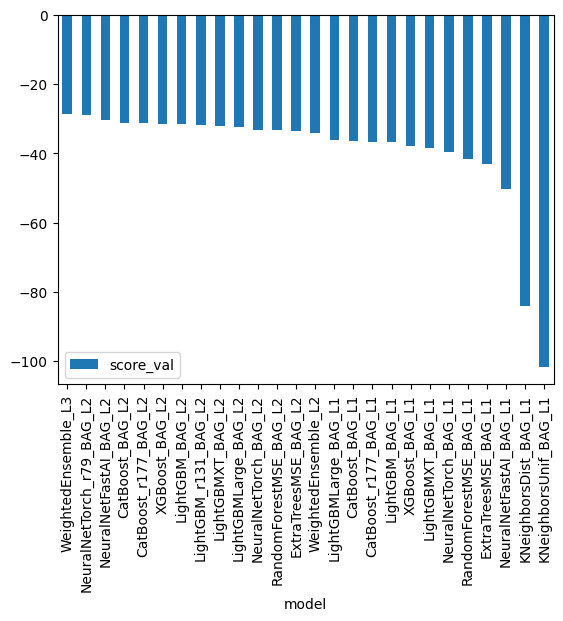

In [21]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()


0    17.163139
1     7.427765
2     5.896519
3     5.249405
4     4.848401
Name: count, dtype: float32

In [ ]:

predictions_new_features.describe()


count    6493.000000
mean      107.972183
std        99.840973
min         1.805482
25%        39.521378
50%        71.849640
75%       149.511108
max       692.998230
Name: count, dtype: float64

In [23]:

# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [24]:
submission_new_features = submission.copy()

# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [150]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features retry"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 337kB/s]
Successfully submitted to Bike Sharing Demand

In [151]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-12-28 01:44:38  new features retry                 complete  1.28827      1.28827       
submission_new_hpo.csv       2024-12-27 22:44:06  new features with hyperparameters  complete  1.75163      1.75163       
submission_new_features.csv  2024-12-27 21:22:00  new features                       complete  1.85532      1.85532       
submission.csv               2024-12-27 19:15:05  first raw submission               complete  1.84847      1.84847       


#### New Score of `1.28827`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [31]:
import autogluon.common.space as space

In [89]:
gbm_options = {
    'learning_rate': 0.15,
    'num_leaves': space.Int(lower=30, upper=60, default=50),
    'num_iterations': space.Int(lower=100, upper=300, default=150)
}

xgb_options = {
    'n_estimators': space.Int(lower=100, upper=300, default=125),
    'learning_rate': space.Real(0.01, 0.1, log=True),
    'max_depth': 5
}

nn_options = {
    'num_epochs': 14,
    'learning_rate': space.Real(0.001, 0.1, default=0.1, log=True),
    'dropout_prob': space.Real(0.0, 0.6, default=0.1)
}

hyperparameters = {
    'GBM': gbm_options,
    'XGB': xgb_options,
    'NN_TORCH': nn_options
}

hyperparameter_tune_kwargs = {
    'num_trials': 6, 
    'scheduler' : 'local', 
    'searcher': 'auto'
}

predictor_new_hpo = TabularPredictor(
    label="count", 
    eval_metric="root_mean_squared_error", 
    ).fit(
        train_data=train, 
        time_limit=600, 
        presets="best_quality", 
        hyperparameters=hyperparameters, 
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
        )

2024-12-27 16:32:03,647	INFO timeout.py:54 -- Reached timeout of 1.3915896042337956 seconds. Stopping all trials.
2024-12-27 16:32:03,651	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/Users/darkmoon/Code/courses/Udacity/Intro to ML/cd0385-project-starter/project/AutogluonModels/ag-20241227_222117/models/NeuralNetTorch_r89_BAG_L2' in 0.0039s.
2024-12-27 16:32:04,316	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 30f0a2f1: FileNotFoundError('Could not fetch metrics for 30f0a2f1: both result.json and progress.csv were not found at /Users/darkmoon/Code/courses/Udacity/Intro to ML/cd0385-project-starter/project/AutogluonModels/ag-20241227_222117/models/NeuralNetTorch_r89_BAG_L2/30f0a2f1')
- 051b49d6: FileNotFoundError('Could not fetch metrics for 051b49d6: both result.json and progress.csv were not found at /Users/darkmoon/Code/courses/Udacity/Intro to ML/cd0385-project-starter/project/AutogluonModels/ag-20241227

In [90]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                           model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L3  -51.824617  root_mean_squared_error       2.750207  47.089804                0.001759           0.036655            3       True        120
1       RandomForest_r127_BAG_L2  -52.945845  root_mean_squared_error       2.156276  36.175098                0.181496           2.680262            2       True         89
2        RandomForest_r16_BAG_L2  -53.044571  root_mean_squared_error       2.227632  37.076472                0.252853           3.581636            2       True        111
3         RandomForestMSE_BAG_L2  -53.044571  root_mean_squared_error       2.236314  36.971813                0.261535           3.476977            2       True         62
4        RandomForest_r15_BAG_L2  -53.208429  root_mean_squared_erro

/Users/darkmoon/.pyenv/versions/3.10.15/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_r42_BAG_L1': 'StackerEnsembleModel_XT',
  'CatBoost_r137_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_r102_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r13_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'RandomForest_r195_BAG_L1': 'StackerEnsembleModel_RF',
  'NeuralNetFastAI_r145_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r50_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_r11_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'ExtraTrees_r17

In [101]:
predictor_new_hpo_data = predictor_new_hpo.predict(test)

In [102]:
predictor_new_hpo_data.describe()

count    6493.000000
mean      101.966499
std        88.388031
min         3.823211
25%        22.775471
50%        70.326141
75%       170.617081
max       359.074219
Name: count, dtype: float64

In [103]:

# Remember to set all negative values to zero
predictor_new_hpo_data[predictor_new_hpo_data < 0] = 0

In [108]:
submission_new_hpo = submission.copy()
# Same submitting predictions
submission_new_hpo["count"] = predictor_new_hpo_data
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [109]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 360kB/s]
Successfully submitted to Bike Sharing Demand

In [110]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-12-27 22:44:06  new features with hyperparameters  complete  1.75163      1.75163       
submission_new_features.csv  2024-12-27 21:22:00  new features                       complete  1.85532      1.85532       
submission.csv               2024-12-27 19:15:05  first raw submission               complete  1.84847      1.84847       


#### New Score of `1.75163`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

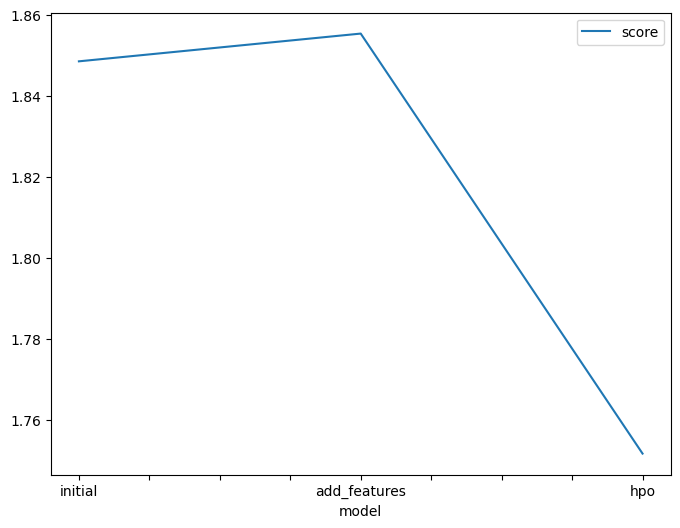

In [111]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.84847, 1.85532, 1.75163]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

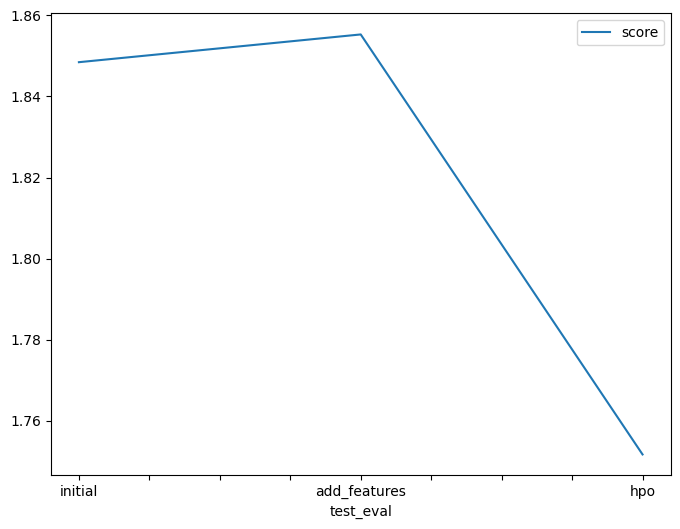

In [112]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84847, 1.85532, 1.75163]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})